In [2]:
import pandas as pd

df = pd.read_csv("../data/OGNT_processed.csv")
df.sample(8)

,Unnamed: 0,book,chapter,verse,word,lemma,trans,author
31579,31579,lk,2,46,και,καί,and,luke
102033,102033,gal,2,2,εις,εἰς,toward,paul
120094,120094,heb,12,23,και,καί,and,unknown
9410,9410,mt,16,12,συνηκαν,συνίημι,to understand,matthew
20411,20411,mk,4,17,εαυτοις,ἑαυτοῦ,my/your/him-self,mark
76299,76299,acts,17,34,ο,ὁ,the/this/who,luke
43252,43252,lk,17,10,οτι,ὅτι,that/since,luke
30113,30113,lk,1,28,Κυριος,κύριος,lord,luke


In [3]:
import numpy as np

print(f"Words total: {len(df["word"])}")
print(f"Unique words: {len(np.unique(df["word"]))}")
print(f"Unique lemmas: {len(np.unique(df["lemma"]))}")

Words total: 138013
Unique words: 18310
Unique lemmas: 5395


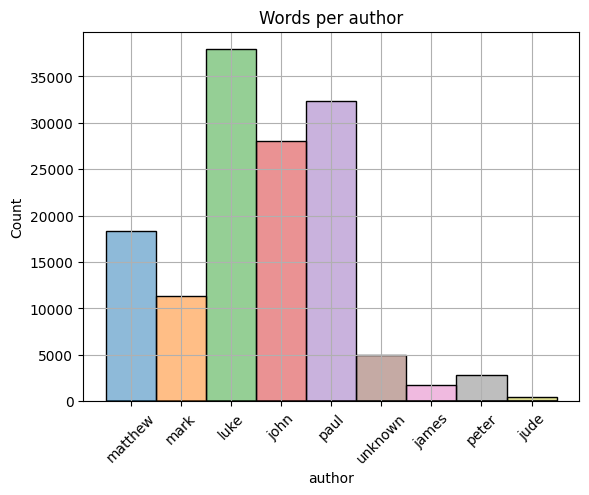

In [4]:
from matplotlib import pyplot as plt
import seaborn as sns

sns.histplot(df, x="author", hue="author", legend=False)
plt.grid()
plt.title("Words per author")
plt.xticks(rotation=45)
plt.show()

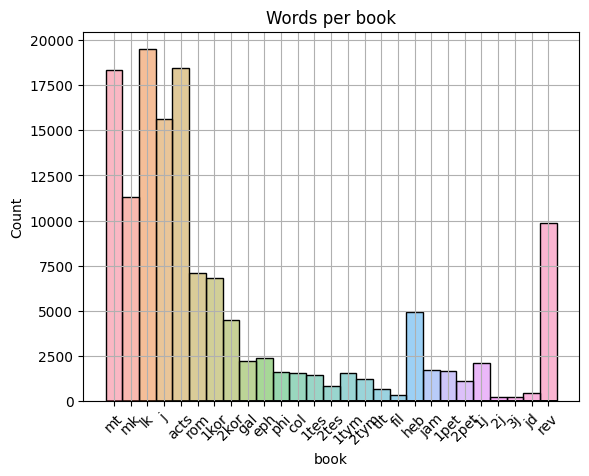

In [5]:
from matplotlib import pyplot as plt
import seaborn as sns

sns.histplot(df, x="book", hue="book", legend=False)
plt.grid()
plt.title("Words per book")
plt.xticks(rotation=45)
plt.show()

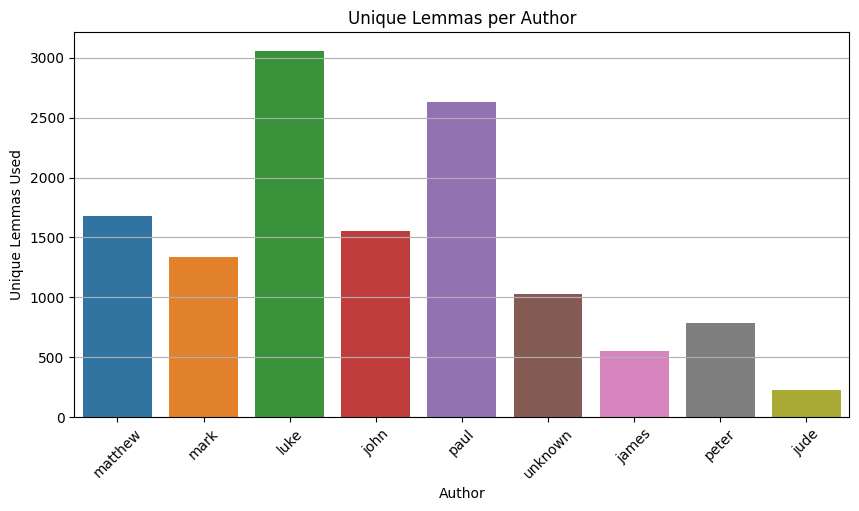

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Count unique lemmas per author
author_lemmas = df.groupby("author", sort=False)["lemma"].nunique().reset_index()

# Plot histogram
plt.figure(figsize=(10, 5))
plt.grid()
sns.barplot(x="author", y="lemma", hue="author", data=author_lemmas)

plt.xlabel("Author")
plt.ylabel("Unique Lemmas Used")
plt.title("Unique Lemmas per Author")
plt.xticks(rotation=45)

plt.show()


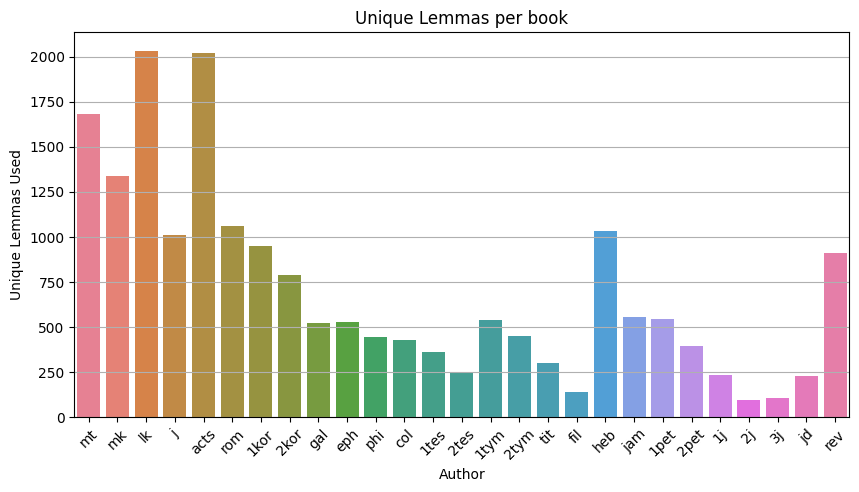

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Count unique lemmas per book
author_lemmas = df.groupby("book", sort=False)["lemma"].nunique().reset_index()

# Plot histogram
plt.figure(figsize=(10, 5))
plt.grid()
sns.barplot(x="book", y="lemma", hue="book", data=author_lemmas)

plt.xlabel("Author")
plt.ylabel("Unique Lemmas Used")
plt.title("Unique Lemmas per book")
plt.xticks(rotation=45)

plt.show()

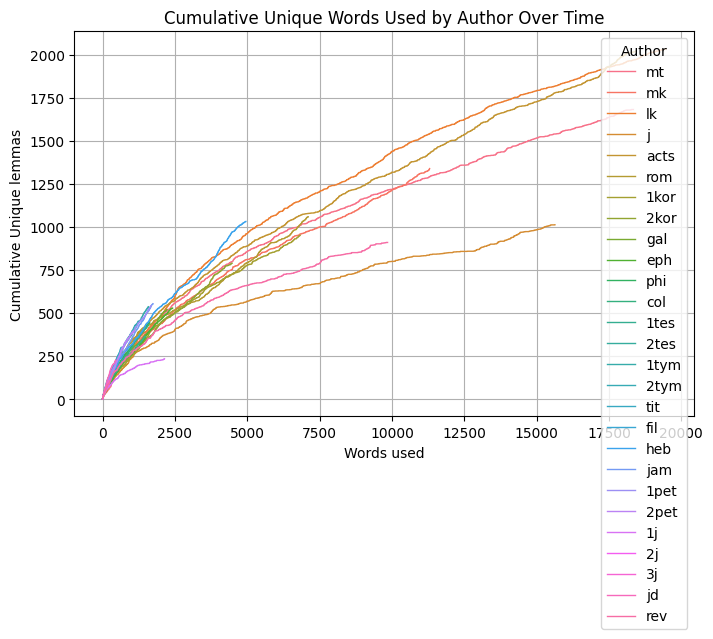

In [8]:
df["b_pos"] = df.groupby("book", sort=False).cumcount() + 1


df["b_unq"] = ~df.duplicated(subset = ["book", "lemma"])
df["b_unq"] = df.groupby("book", sort=False)["b_unq"].cumsum()

# Plot the progression
plt.figure(figsize=(8, 5))
sns.lineplot(data=df, x="b_pos", y="b_unq", hue="book", lw=1)

plt.xlabel("Words used")
plt.ylabel("Cumulative Unique lemmas")
plt.title("Cumulative Unique Words Used by Author Over Time")
plt.legend(title="Author")
plt.grid()
plt.show()


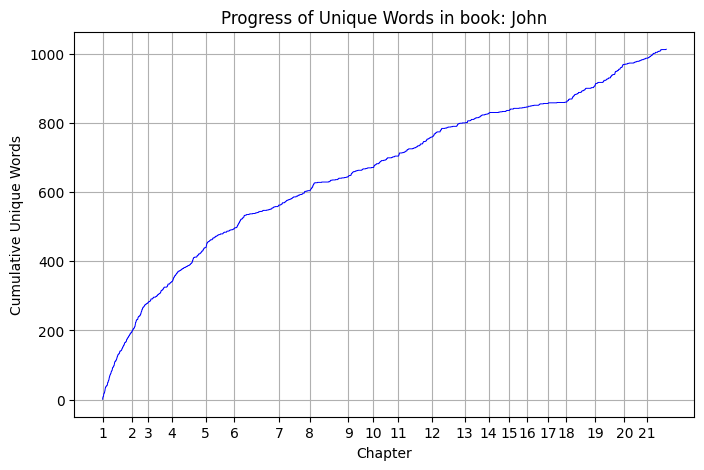

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

book = "j"

book_df = df[df["book"] == book].copy()

book_df["b_pos"] = range(1, len(book_df) + 1)

book_df["b_unq"] = ~book_df.duplicated(subset=["lemma"])
book_df["b_unq"] = book_df["b_unq"].cumsum()

chapter_positions = book_df.groupby("chapter")["b_pos"].first()

plt.figure(figsize=(8, 5))
sns.lineplot(data=book_df, x="b_pos", y="b_unq", color="b", linewidth=0.7)

plt.xticks(ticks=chapter_positions, labels=chapter_positions.index)

plt.xlabel("Chapter")
plt.ylabel("Cumulative Unique Words")
plt.title(f"Progress of Unique Words in book: John")
plt.grid()
plt.show()
